In [68]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

In [72]:
import os

def get_image_paths():
    """
    Retrieves image paths from the a specified folder, ie., the photos/ directory in this case.
    
    Input:
    None
    
    Output:
    files - A list of image paths
    """
    folder = os.path.dirname("photos/")
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

X_img_paths = get_image_paths()
print(X_img_paths)

['photos/_0_0.jpg', 'photos/_1_34_.jpg']


In [73]:
import numpy as np
import matplotlib.image as mpimg

IMAGE_SIZE = 224

def tf_resize_images(X_img_file_paths):
    """
    Standardize the input set but resizing all images to (224,224) 
    
    Input:
    X_img_file_paths - A list of image paths that are obtained by using the get_images_paths() function. 
    
    Output:
    X_data - A Tensor of shape (None, 224, 224, 3)
    """
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), 
                                    tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in enumerate(X_img_file_paths):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

In [75]:
# Standardize the size of the images
X_imgs = tf_resize_images(X_img_paths)
print(X_imgs.shape)
# If a .DS_Store error occurs:
#     Open Terminal and execute the following line
#     find . -name '.DS_Store' -type f -delete

(2, 224, 224, 3)


In [92]:
train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [85]:
transformed_image = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':1,'ty':1})

In [86]:
transformed_image_1 = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':-1,'ty':-1})

In [87]:
transformed_image_2 = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':10,'ty':10})

In [88]:
transformed_image_3 = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':-10,'ty':-10})

In [89]:
transformed_image_4 = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':50,'ty':50})

In [90]:
transformed_image_5 = train_datagen.apply_transform(x=X_imgs[0], transform_parameters={'tx':-50,'ty':-50})

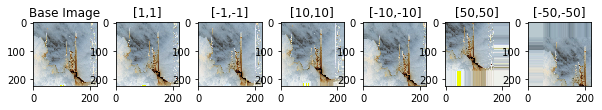

In [91]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import cv2

gs = gridspec.GridSpec(1, 7)
gs.update(wspace = 0.30, hspace = 2)

fig, ax = plt.subplots(figsize = (10, 10))

# Picture 1
plt.subplot(gs[0])
plt.imshow(cv2.cvtColor(X_imgs[0], cv2.COLOR_BGR2RGB))
plt.title('Base Image')

# Picture 2
plt.subplot(gs[1])
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('[1,1]')

# Picture 3
plt.subplot(gs[2])
plt.imshow(cv2.cvtColor(transformed_image_1, cv2.COLOR_BGR2RGB))
plt.title('[-1,-1]')

# Picture 4
plt.subplot(gs[3])
plt.imshow(cv2.cvtColor(transformed_image_2, cv2.COLOR_BGR2RGB))
plt.title('[10,10]')

# Picture 5
plt.subplot(gs[4])
plt.imshow(cv2.cvtColor(transformed_image_3, cv2.COLOR_BGR2RGB))
plt.title('[-10,-10]')

# Picture 6
plt.subplot(gs[5])
plt.imshow(cv2.cvtColor(transformed_image_4, cv2.COLOR_BGR2RGB))
plt.title('[50,50]')

# Picture 7
plt.subplot(gs[6])
plt.imshow(cv2.cvtColor(transformed_image_5, cv2.COLOR_BGR2RGB))
plt.title('[-50,-50]')

plt.show()